In [92]:
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Data Preprocessing:
### Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, 
### removing duplicates, and converting the data to appropriate format.  


In [93]:
df = pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\Association Rules\Association Rules\Online retail.xlsx")

In [94]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [96]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [97]:
# Removing duplicates
df = df.drop_duplicates()

In [98]:
# Converting the transaction strings into a list of lists
transactions = data.iloc[:, 0].apply(lambda x: x.split(','))

# the first few transactions
transactions.head()

0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object

# Association Rule Mining:
### •	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
### •	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
### •	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [99]:
# Convert the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [100]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.029179,(almonds)
1,0.011014,(antioxydant juice)
2,0.045797,(avocado)
3,0.012560,(bacon)
4,0.015459,(barbecue sauce)
...,...,...
431,0.014686,"(mineral water, olive oil, spaghetti)"
432,0.016618,"(mineral water, pancakes, spaghetti)"
433,0.012367,"(shrimp, mineral water, spaghetti)"
434,0.010821,"(spaghetti, mineral water, soup)"


In [101]:
# Generating the association rules with a minimum confidence of 0.2 and lift greater than 1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules[rules['lift'] > 1]
# Sort the rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

In [102]:
# the top rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
338,"(milk, soup)",(mineral water),0.021449,0.299710,0.012367,0.576577,1.923781,0.005939,1.653876,0.490716
302,"(frozen vegetables, ground beef)",(mineral water),0.024541,0.299710,0.013333,0.543307,1.812775,0.005978,1.533393,0.459640
351,"(soup, spaghetti)",(mineral water),0.020676,0.299710,0.010821,0.523364,1.746235,0.004624,1.469236,0.436362
327,"(pancakes, ground beef)",(mineral water),0.020870,0.299710,0.010821,0.518519,1.730067,0.004566,1.454448,0.430982
203,"(chicken, chocolate)",(mineral water),0.021256,0.299710,0.011014,0.518182,1.728943,0.004644,1.453432,0.430768
332,"(olive oil, milk)",(mineral water),0.024155,0.299710,0.012367,0.512000,1.708317,0.005128,1.435020,0.424892
303,"(frozen vegetables, ground beef)",(spaghetti),0.024541,0.229565,0.012560,0.511811,2.229480,0.006927,1.578149,0.565339
251,"(olive oil, chocolate)",(mineral water),0.023575,0.299710,0.011981,0.508197,1.695627,0.004915,1.423923,0.420153
322,"(ground beef, milk)",(mineral water),0.031691,0.299710,0.016039,0.506098,1.688623,0.006541,1.417871,0.421148
281,"(eggs, ground beef)",(mineral water),0.028792,0.299710,0.014493,0.503356,1.679475,0.005863,1.410043,0.416570


# Analysis and Interpretation:
### •	Analyse the generated rules to identify interesting patterns and relationships between the products.
### •	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


In [103]:
# Sorting the rules by confidence and lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# top 10 rules
print("Top 10 Association Rules:\n")
sorted_rules.head(10)


Top 10 Association Rules:



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
338,"(milk, soup)",(mineral water),0.021449,0.299710,0.012367,0.576577,1.923781,0.005939,1.653876,0.490716
302,"(frozen vegetables, ground beef)",(mineral water),0.024541,0.299710,0.013333,0.543307,1.812775,0.005978,1.533393,0.459640
351,"(soup, spaghetti)",(mineral water),0.020676,0.299710,0.010821,0.523364,1.746235,0.004624,1.469236,0.436362
327,"(pancakes, ground beef)",(mineral water),0.020870,0.299710,0.010821,0.518519,1.730067,0.004566,1.454448,0.430982
203,"(chicken, chocolate)",(mineral water),0.021256,0.299710,0.011014,0.518182,1.728943,0.004644,1.453432,0.430768
332,"(olive oil, milk)",(mineral water),0.024155,0.299710,0.012367,0.512000,1.708317,0.005128,1.435020,0.424892
303,"(frozen vegetables, ground beef)",(spaghetti),0.024541,0.229565,0.012560,0.511811,2.229480,0.006927,1.578149,0.565339
251,"(olive oil, chocolate)",(mineral water),0.023575,0.299710,0.011981,0.508197,1.695627,0.004915,1.423923,0.420153
322,"(ground beef, milk)",(mineral water),0.031691,0.299710,0.016039,0.506098,1.688623,0.006541,1.417871,0.421148
281,"(eggs, ground beef)",(mineral water),0.028792,0.299710,0.014493,0.503356,1.679475,0.005863,1.410043,0.416570


In [104]:
for index, row in sorted_rules.head(10).iterrows():
    print(f"Rule: {row['antecedents']} -> {row['consequents']}")
    print(f"Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    print("--------------------\n")


Rule: frozenset({'milk', 'soup'}) -> frozenset({'mineral water'})
Support: 0.0124, Confidence: 0.5766, Lift: 1.9238
--------------------

Rule: frozenset({'frozen vegetables', 'ground beef'}) -> frozenset({'mineral water'})
Support: 0.0133, Confidence: 0.5433, Lift: 1.8128
--------------------

Rule: frozenset({'soup', 'spaghetti'}) -> frozenset({'mineral water'})
Support: 0.0108, Confidence: 0.5234, Lift: 1.7462
--------------------

Rule: frozenset({'pancakes', 'ground beef'}) -> frozenset({'mineral water'})
Support: 0.0108, Confidence: 0.5185, Lift: 1.7301
--------------------

Rule: frozenset({'chicken', 'chocolate'}) -> frozenset({'mineral water'})
Support: 0.0110, Confidence: 0.5182, Lift: 1.7289
--------------------

Rule: frozenset({'olive oil', 'milk'}) -> frozenset({'mineral water'})
Support: 0.0124, Confidence: 0.5120, Lift: 1.7083
--------------------

Rule: frozenset({'frozen vegetables', 'ground beef'}) -> frozenset({'spaghetti'})
Support: 0.0126, Confidence: 0.5118, Lift

In [105]:
support = sorted_rules["support"]
confidence =  sorted_rules["confidence"]
lift = sorted_rules["lift"]

## Histogram

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

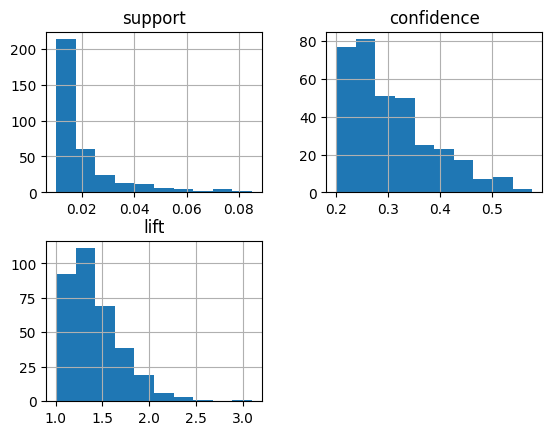

In [106]:
rules[['support','confidence','lift']].hist()

## 2D scatter plot

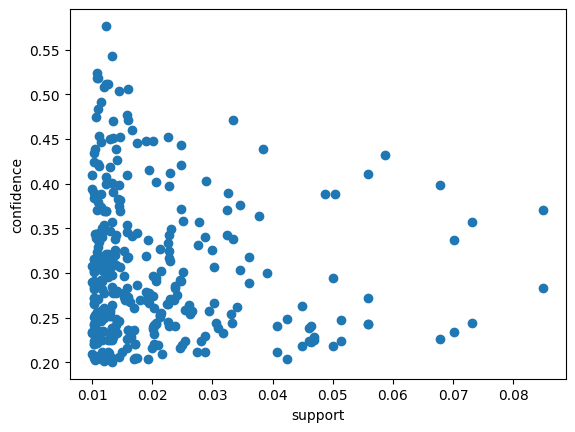

In [107]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## 3D scatter plot

Text(0.5, 0, 'lift')

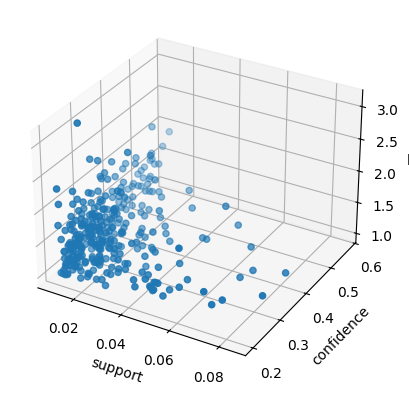

In [108]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

## scatter plot

Text(0, 0.5, 'confidence')

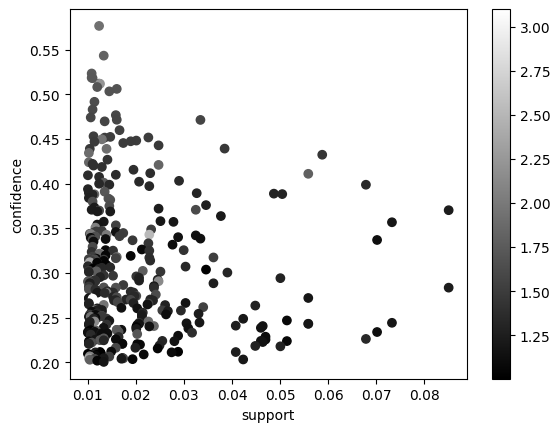

In [109]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

# Interview Questions:

### 1.	What is lift and why is it important in Association rules?

In [110]:
""" Lift is a key metric in association rule mining, used to evaluate the strength and significance of a rule. 
    It helps to understand whether the occurrence of one itemset increases the probability of the occurrence of another itemset.

    Importance of Lift: Measure of Dependency, Avoiding Spurious Associations, provides a way to difference b/w significant and insignificant association rules. """

' Lift is a key metric in association rule mining, used to evaluate the strength and significance of a rule. \n    It helps to understand whether the occurrence of one itemset increases the probability of the occurrence of another itemset.\n\n    Importance of Lift: Measure of Dependency, Avoiding Spurious Associations, provides a way to difference b/w significant and insignificant association rules. '

### 2.	What is support and Confidence. How do you calculate them?

In [111]:
""" Support and Confidence are fundamental metrics used in association rule mining to evaluate the usefulness and accuracy of discovered rules.

    1. Support:
    Support measures how frequently an itemset appears in the dataset. 
    It provides an indication of how often the items in a rule occur together in the transactional data.
    
    Support= (Number of transactions containing A) / (Total number of transactions)

    2. Confidence
    Confidence measures the likelihood that itemset B is purchased when itemset A is purchased. It indicates the reliability of the rule A-->B.
    
    Confidence = Support(A∪B) / Support(A) """

' Support and Confidence are fundamental metrics used in association rule mining to evaluate the usefulness and accuracy of discovered rules.\n\n    1. Support:\n    Support measures how frequently an itemset appears in the dataset. \n    It provides an indication of how often the items in a rule occur together in the transactional data.\n    \n    Support= (Number\xa0of\xa0transactions\xa0containing\xa0A) / (Total\xa0number\xa0of\xa0transactions)\n\n    2. Confidence\n    Confidence measures the likelihood that itemset B is purchased when itemset A is purchased. It indicates the reliability of the rule A-->B.\n    \n    Confidence = Support(A∪B) / Support(A) '

### 3.	What are some limitations or challenges of Association rules mining?

In [112]:
""" limitations and challenges:
         1. Rule complexity
         2. Limited relationships
         3. Parameter sensitivity
         4. Data cleansing
         5. Algorithm parameters """ 

' limitations and challenges:\n         1. Rule complexity\n         2. Limited relationships\n         3. Parameter sensitivity\n         4. Data cleansing\n         5. Algorithm parameters '